## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
df = pd.merge(study_results, mouse_metadata,  on="Mouse ID", how = "outer")


df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
#mouse_metadata Mouse ID	Drug Regimen	Sex	Age_months	Weight (g)
#study_results Mouse ID	Timepoint	Tumor Volume (mm3)	Metastatic Sites

## Summary statistics

In [3]:
# Generate a summary statistics table consisting of the mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

byRegimen = df.groupby("Drug Regimen")

ss_dict = {'Mean Tumor volume'              : byRegimen['Tumor Volume (mm3)'].mean(), 
           'Median Tumor volume'            : byRegimen['Tumor Volume (mm3)'].median(), 
           'Tumor volume Variance'          : byRegimen['Tumor Volume (mm3)'].var(), 
           'Tumor volume Standard Deviation': byRegimen['Tumor Volume (mm3)'].std(), 
           'Tumor volume SEM'               : byRegimen['Tumor Volume (mm3)'].sem(), 
    }
summaryStats = pd.DataFrame(data=ss_dict)

summaryStats

,Mean Tumor volume,Median Tumor volume,Tumor volume Variance,Tumor volume Standard Deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

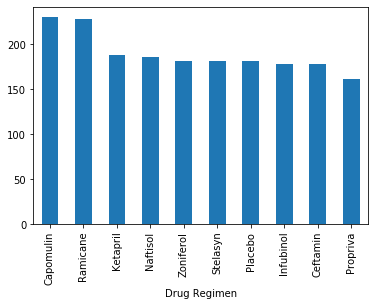

In [4]:
# Generate a bar plot showing number of data points for each 
# treatment regimen using pandas

plotData = byRegimen['Mouse ID'].count().sort_values(ascending = False)
plotData.plot.bar(x='Drug', y = "Quantity")
#plotData

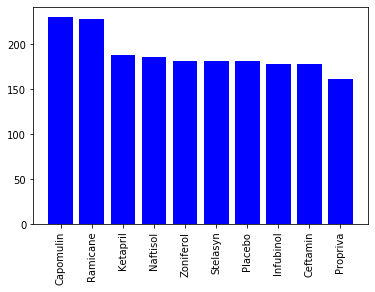

In [5]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pyplot

# Count the number of mice (by id) in each regimen and sort them descending order
plotdf = byRegimen['Mouse ID'].count().sort_values(ascending = False)

# Set the values for the x_axis and map the drug names onto the values
x_axis = np.arange(len(plotdf))
plt.xticks(x_axis, plotdf.keys(), rotation=90)

# plot the data using pyplot
plt.bar(x_axis, plotdf, color='b', align="center")

# Display the plot
plt.show()

## Pie plots

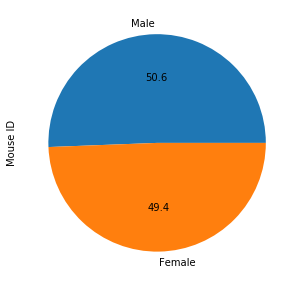

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_mice = df.groupby("Sex")
mf = mf_mice['Mouse ID'].count().sort_values(ascending=False)

plot = mf.plot(kind = 'pie', y='Sex', figsize=(5, 5), autopct='%.1f')


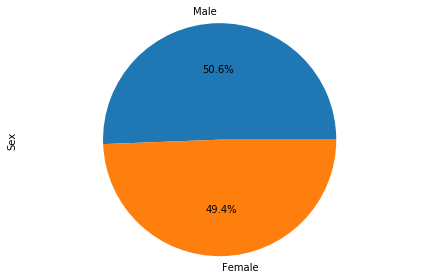

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
def format_value(val):
    return "{:.1f}%".format(val)

labels = ["Male", "Female"]

plt.pie(mf, labels = labels,  autopct=format_value )
plt.axis('equal')
plt.ylabel('Sex')

plt.tight_layout()
plt.show()


## Quartiles, outliers and boxplots

In [63]:
def checkForOutliers(drug):
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume for  is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

# Calculate the final tumor volume of each mouse across four 
#of the most promising treatment regimens. 



topfour = byRegimen['Mouse ID'].count().sort_values(ascending = False)
toptreatments = topfour.head(4).keys()
toptreatments

# mice      = df.groupby("Mouse ID")
# mdf       = mice.tail(1)

#justTopFour.groupby('Mouse ID').agg(['count', 'size', 'nunique'])
                 
# for drug_treatment in topTreatments:
#     print(drug_treatment)

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# quartiles = finalfour.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq}")
# print(f"The upper quartile of tumor volume is: {upperq}")
# print(f"The interquartile range of tumor volume is: {iqr}")
# print(f"The the median of tumor volume is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol'], dtype='object', name='Drug Regimen')

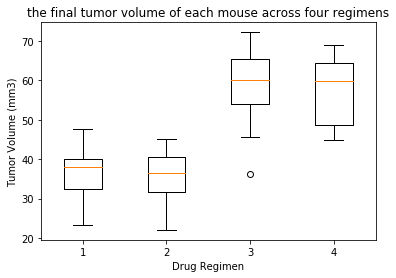

In [53]:
# Generate a box plot of the final tumor 
# volume of each mouse across four regimens of interest

mice      = df.groupby("Mouse ID")
mdf       = mice.tail(1)

capomulin = mdf[mdf["Drug Regimen"] == "Capomulin"]
ramicane  = mdf[mdf["Drug Regimen"] == "Ramicane"]
infubinol = mdf[mdf["Drug Regimen"] == "Infubinol"]
ceftamin  = mdf[mdf["Drug Regimen"] == "Ceftamin"]

datatoplot = [capomulin['Tumor Volume (mm3)'], 
              ramicane['Tumor Volume (mm3)'], 
              infubinol['Tumor Volume (mm3)'], 
              ceftamin['Tumor Volume (mm3)']]

fig, ax1   = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across four regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(datatoplot)

plt.show()


In [61]:
# mice = df.groupby("Mouse ID")
# mdf = mice.tail(1)
# mdf = mdf[['Tumor Volume (mm3)', 'Drug Regimen']]
# mdf

,Tumor Volume (mm3),Drug Regimen
9,38.982878,Capomulin
10,45.000000,Ketapril
18,71.905117,Ketapril
21,49.783419,Ketapril
30,62.175705,Ketapril
...,...,...
1857,34.455298,Capomulin
1867,47.685963,Capomulin
1877,33.329098,Capomulin
1882,30.485985,Capomulin


## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume 
# for a single mouse treated with Capomulin
capomulin = df[df["Drug Regimen"] == "Capomulin"]


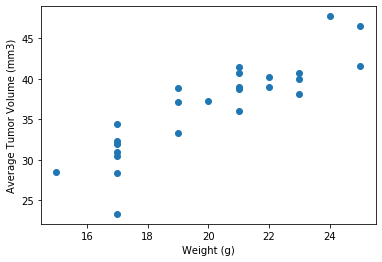

In [67]:
# Generate a scatter plot of mouse weight versus average 
# tumor volume for the Capomulin regimen
plt.scatter(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimen

In [68]:
correlation = st.pearsonr(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
print (f"The Correlation betwcoefficient between mouse weight and average tumor volume is {round(correlation[0])}")

The Correlation betwcoefficient between malic_acid and flavanoids is 1.0
